205
4096


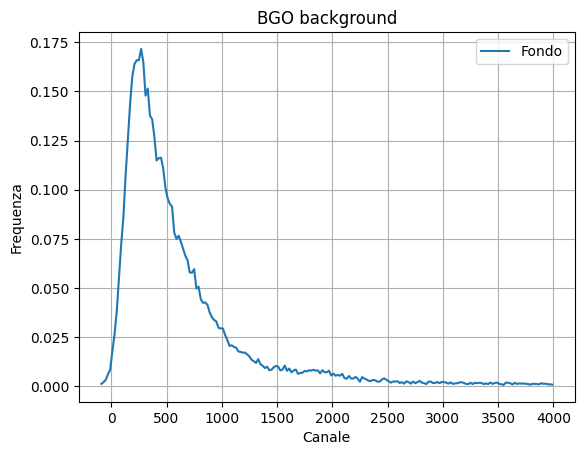

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\BGO\Fondo BGO\BGO-fondo-newgate.CSV', sep=';') # fondo
data1 = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\BGO\Cobalto\Spettro Co 2ndRun.csv', sep=' \t', engine='python')

print(len(data['Channel']))
print(len(data1['Channel']))


channel_back = np.array(data['Channel']) #taglio i dati per avere lo stesso numero di elementi
counts_back = np.array(data['Counts'])
time_back = 9218 #s
frequency_back = counts_back/time_back

channel_Co = np.array(data1['Channel'][:205])
counts_Co = np.array(data1['Counts'][:205])
time_Co = 300 #s
frequency_Co = counts_Co/time_Co

plt.plot(channel_back, frequency_back, label='Fondo')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('BGO background')
plt.legend()
plt.grid()
plt.show()

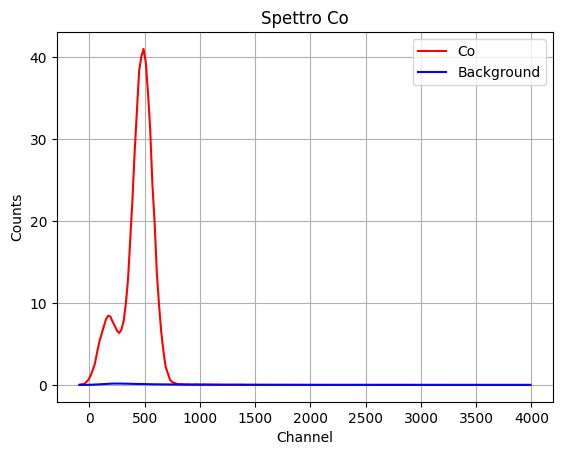

In [2]:
plt.plot(channel_Co, frequency_Co, marker='', linestyle='-', color='red', label='Co')
plt.plot(channel_back, frequency_back, marker='', linestyle='-', color='blue', label='Background')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Spettro Co')
plt.legend()
plt.grid()
plt.show()

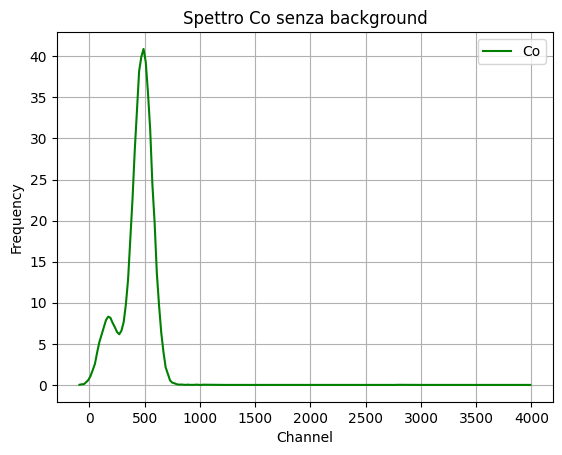

In [3]:
channel = channel_back
frequency = frequency_Co - frequency_back

for i in range(len(frequency)):
    if frequency[i] < 0:
        frequency[i] = 0

plt.plot(channel, frequency, marker='', linestyle='-', color='green', label='Co')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.legend()
plt.title('Spettro Co senza background')
plt.grid()

import plotly.express as px

fig = px.line(x=channel, y=frequency, title='Spettro Co senza background')
fig.show()

In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2


def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list)

In [5]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

error = np.sqrt(counts_Co)/time_Co

ls = LeastSquares(channel, frequency, error, func)

peak_list14_4 = 0
error_peak_list14_4 = 0
sigma_list14_4 = 0
err_sigma_list14_4 = 0
print(peak_list14_4)
print(error_peak_list14_4)

0
0


In [6]:
peak_list122_1, error_peak_list122_1, sigma_list122_1, err_sigma_list122_1 = repeat_fit(ls, 320, 700, 480, 150, 42, 100)
print(peak_list122_1)
print(error_peak_list122_1)

[484.1232113  484.1232113  484.45875189 484.45875189 484.43657187
 484.43657187 484.59210384 484.06248892 484.34969213 484.00334048
 484.00334048 484.85742642 484.78575278 484.95147198 483.87239488
 483.87239488]
[0.39318151 0.39318151 0.71797556 0.71797556 1.1628615  1.1628615
 0.66625207 0.37750145 0.41182178 0.4480197  0.4480197  0.59655778
 0.61838475 1.7961427  4.32189884 4.32189884]


In [7]:
def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = np.sqrt((abs(np.max(values) - np.min(values))/2)**2 + (1/np.sum(1/(errors**2))))
    return mean, error_mean

# first peak at 14.4 keV
print(0, 0)

# second peak at 122.1 keV
mean122_1, error_mean122_1 = weighted_mean(peak_list122_1, error_peak_list122_1)
print(mean122_1, error_mean122_1)

print(0, 0)
print(weighted_mean(sigma_list122_1, err_sigma_list122_1))

0 0
484.25640155547296 0.5580311654516746
0 0
(86.27996358377669, 1.3058482556674695)


In [14]:
# estrapolazione energie dai picchi strani del sodio

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=channel_Co, y=frequency_Co, mode='lines', name='Sodio')])
fig.show()

def parabola(x, a, x0, y0):
    return a*(x-x0)**2 + y0

def energy(x, k, eta):
    return -np.log(1 - x/k)/eta

def err_energy(x, err_x, k, eta, err_k, err_eta):
    return np.sqrt((err_eta/eta**2 * np.log(1-x/k))**2 + (x/(eta*k**2)/(1-x/k))**2 * err_k**2 + (err_x/(k*eta*(1-x/k)))**2)

error = np.sqrt(counts_Co)/time_Co

ls = LeastSquares(channel_Co, frequency_Co, error, parabola)
m = Minuit(ls, a=-1, x0=180, y0=np.max(frequency_Co))
ls.mask = (channel_Co > 120) & (channel_Co < 250)
m.migrad()
m.hesse()
display(m)

ADC_peak = m.values['x0']
ADC_error = m.errors['x0']

a=1.8092989501617642e-05 
b=219871.22651514484
a_err=1.1547031884476644e-06 
b_err=13919.286076137916


energy_peak = energy(ADC_peak, b, a)
error_energy_peak = err_energy(ADC_peak, ADC_error, b, a, b_err, a_err)
print(f'energia picco: {energy_peak} +- {error_energy_peak}')
print(f'compatibilità con 46kev: {abs(energy_peak-46)/error_energy_peak}')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.54 (χ²/ndof = 0.8)       │              Nfcn = 87               │
│ EDM = 0.000175 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -0.50e-3  │  0.07e-3  │            │            │         │         │       │
│ 1 │ x0   │   179.3   │    1.9    │            │            │         │         │       │
│ 2 │ y0   │   8.39    │   0.10    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────┐
│    │         a        x0        y0 │
├────┼───────────────────────────────┤
│  a │  4.26e-09 -4.781e-6 -5.246e-6 │
│ x0 │ -4.781e-6      3.45     0.003 │
│ y0 │ -5.246e-6     0.003    0.0108 │
└────┴───────────────────────────────┘

energia picco: 45.10005238815855 +- 4.0818040145261385
compatibilità con 46kev: 0.2204779084538981
